# 核密度估计与非参数回归

直方图是一种直观简单的估计密度的方式，然而未免太粗糙了。

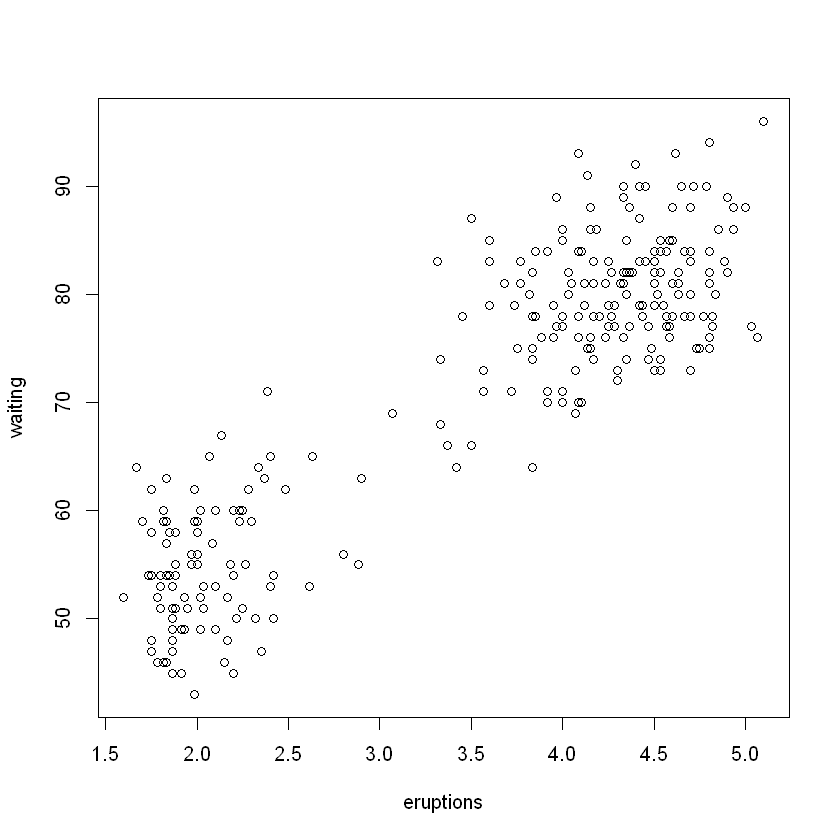

In [1]:
plot(faithful)

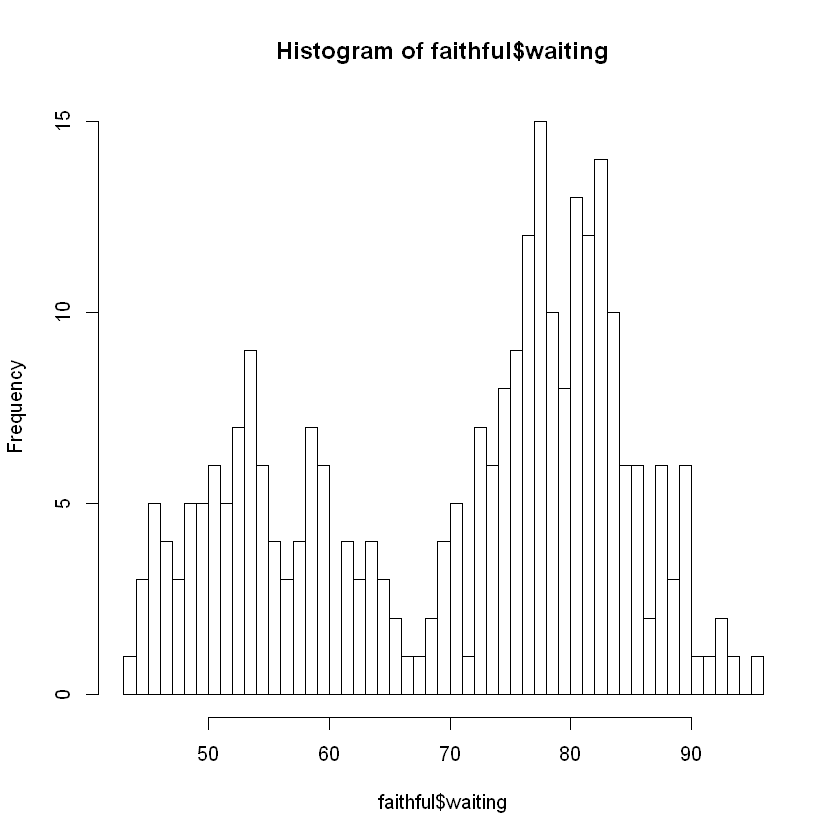

In [6]:
hist(faithful$waiting, breaks=50)

核密度估计令每个样本点以自己为中心提供一个密度函数求和，然后标准化（除以样本个数）得到一个密度函数。从最后得到的函数的角度看，满足以下关系。

$$
\hat{f}(x) = \frac{1}{n} \sum_{i=1}^n f_{i}(x)
$$

一般$f_i(x)$是仅有位置差别的函数。于是有

$$
\hat{f}(x) = \frac{1}{n} \sum_{i=1}^n K(x - x_i)
$$

我们宁可核函数$K$尺度无关，于是把尺度（现在被称为“带宽”bandwidth）放到内部的线性变换里。当然积分因此变大了，
为了维持函数的密度函数性必须在外面多除一个$h$维持标准化。

$$
\hat{f}(x) = \frac{1}{nh}\sum_{i=1}^n K \left(\frac{x - x_i}{h} \right)
$$

这就是标准的核密度估计，核函数$K(u)$可以取一些对称的标准化分布的密度函数，
如标准正态分布密度分布函数。$\frac{1}{\sqrt{2\pi}} \exp(-\frac{1}{2}u^2)$。均匀分布$\frac{1}{2}I(|u|\le 1)$

In [8]:
kde <- function(sam, K, h){
    n <- length(sam)
    function(x){
        sum(K((x - sam)/h))/n/h
    }
}

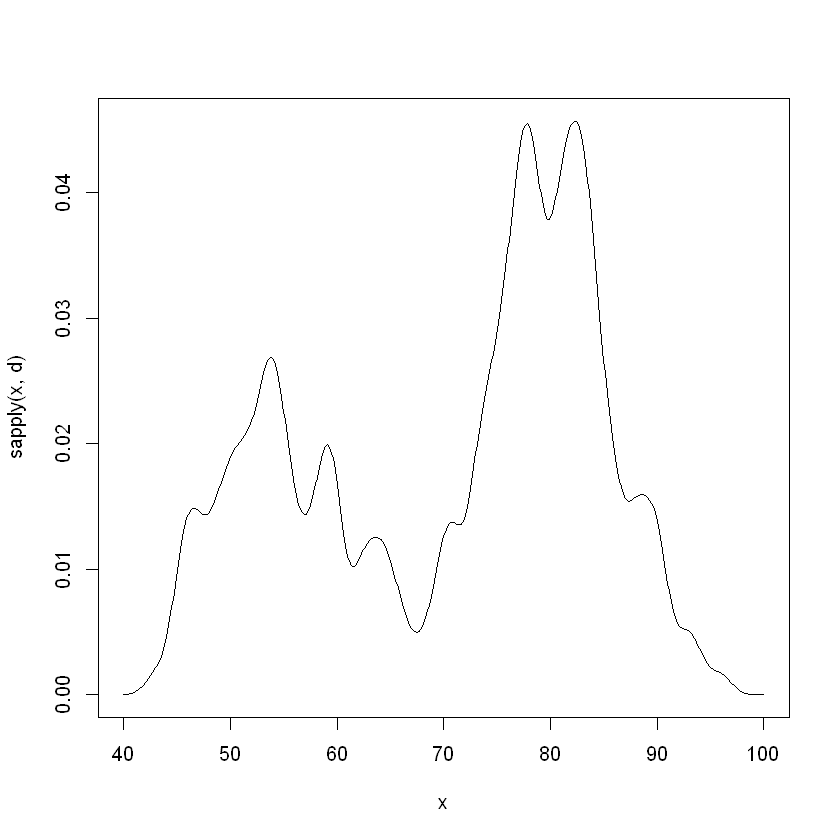

In [24]:
x <- seq(40,100,0.1)
d <- kde(faithful$waiting, dnorm, 1)
plot(x, sapply(x,d),type='l')

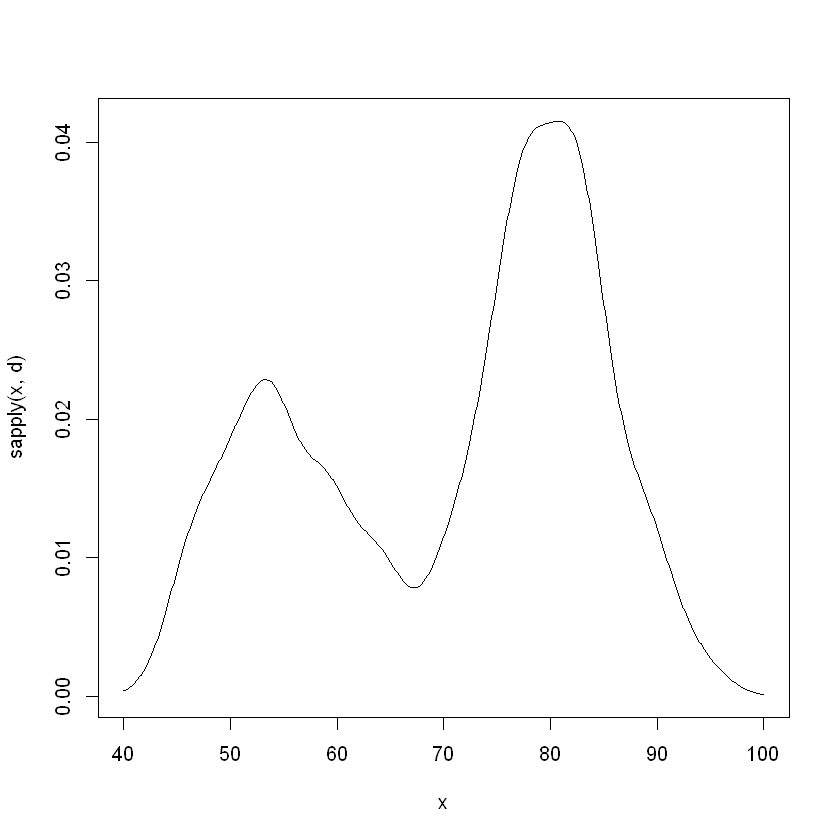

In [25]:
x <- seq(40,100,0.1)
d <- kde(faithful$waiting, dnorm, 2)
plot(x, sapply(x,d),type='l')

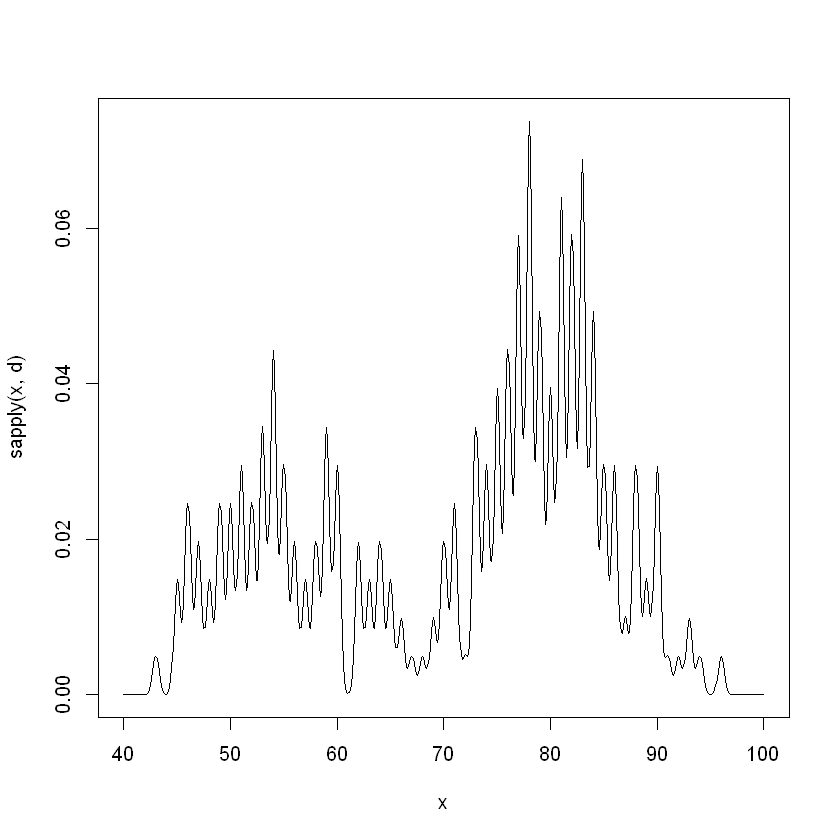

In [26]:
x <- seq(40,100,0.1)
d <- kde(faithful$waiting, dnorm, 0.3)
plot(x, sapply(x,d),type='l')

In [28]:
KU <- function(u){
    1/2*(abs(u) <= 1)
}

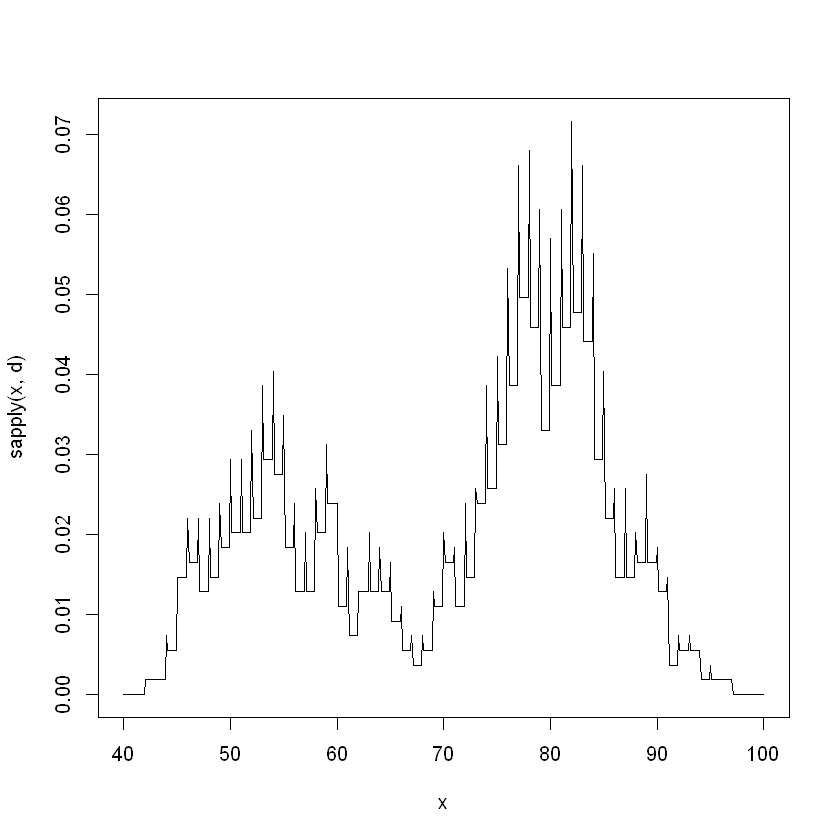

In [30]:
x <- seq(40,100,0.1)
d <- kde(faithful$waiting, KU, 1)
plot(x, sapply(x,d),type='l')

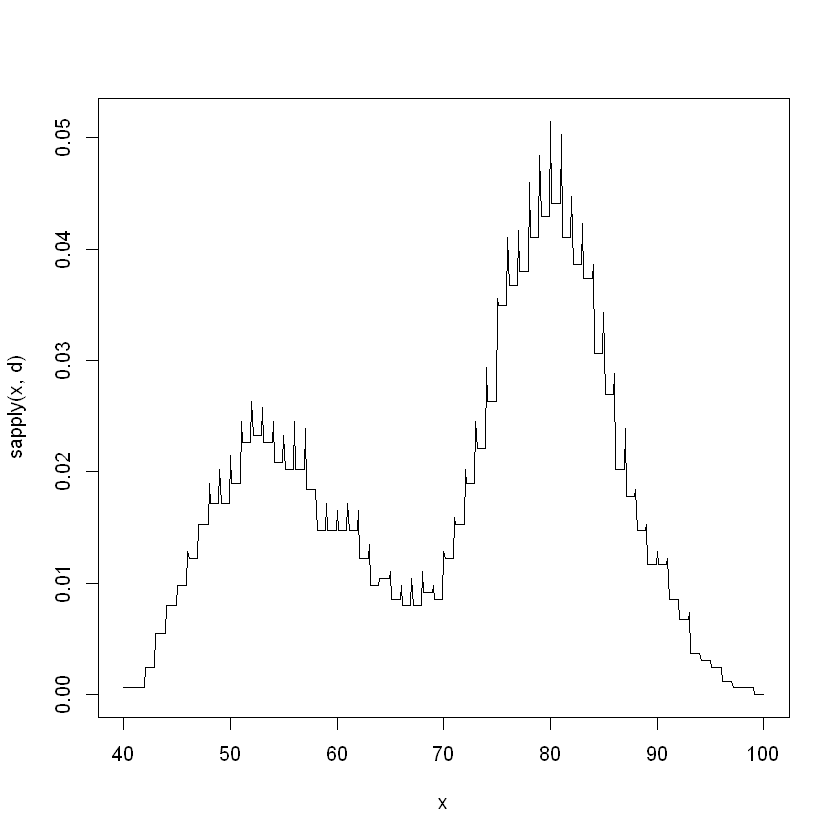

In [32]:
x <- seq(40,100,0.1)
d <- kde(faithful$waiting, KU, 3)
plot(x, sapply(x,d),type='l')

剩下那些内容都没数据就不写了。